# Linear Regression- Boston Data

In [44]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Problem Statement

In [ ]:
To predict boston house prices by using excisting variables.

 CRIM
 ZN 

# 2. Data Gathering

In [3]:
boston_data= load_boston()
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
df= pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['Target']=boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 3. Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4. Feature Selection

### 1. Linearity

In [8]:
df.cov()     # covariance Matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [9]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Target        84.586724
dtype: float64

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


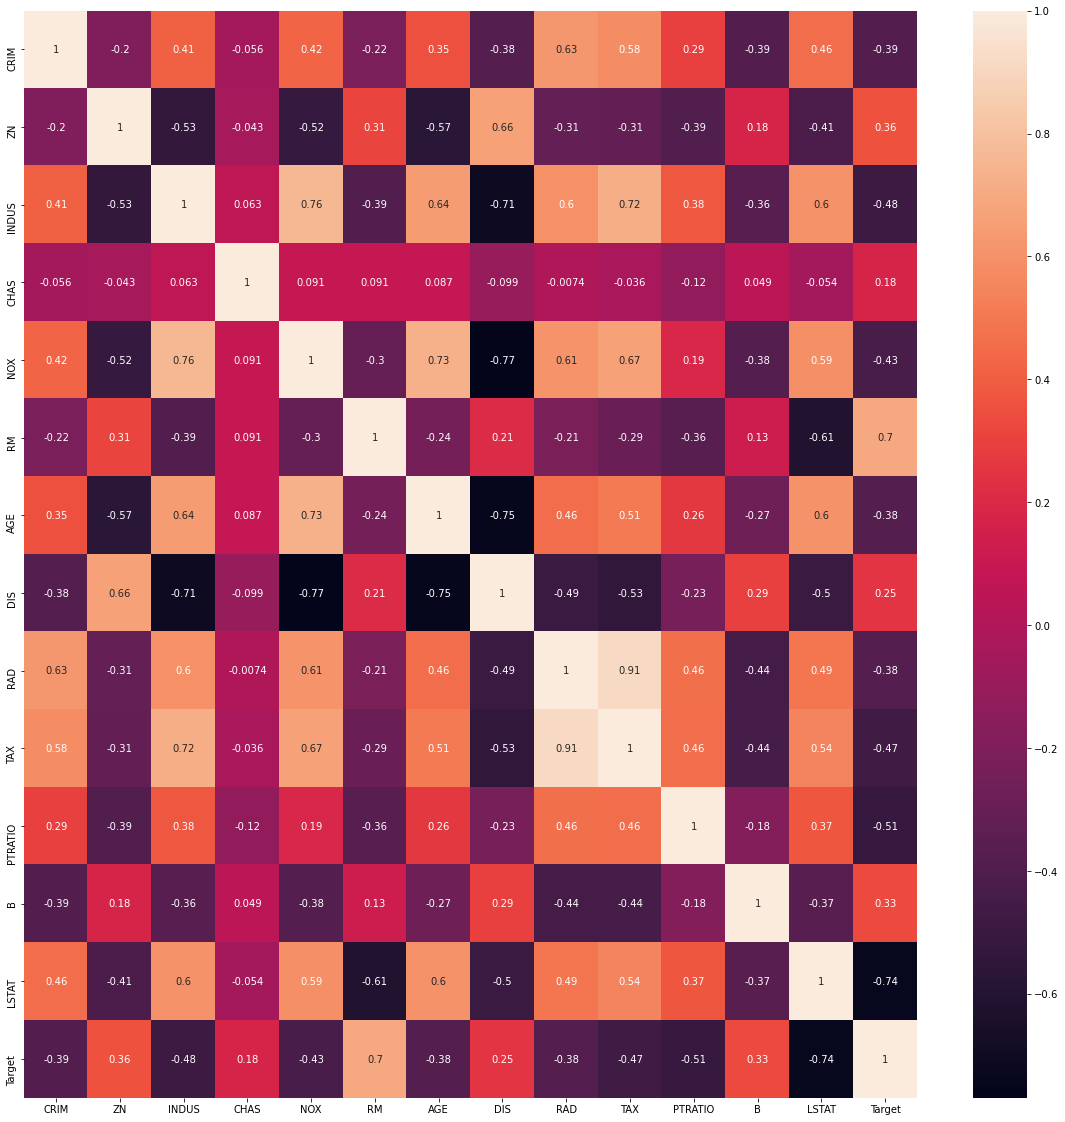

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.savefig('correlation.png')

In [14]:
correlation=df.corr().tail(1)

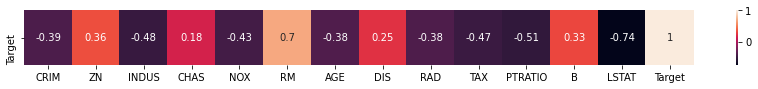

In [18]:
plt.figure(figsize=(15,1))
sns.heatmap(correlation,annot=True)
plt.savefig('correlation_target.png')

### 2. Multicollinearity

In [ ]:
VIF >> Variance Inflation Factor

In [20]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [28]:
df.shape[1]-1

13

In [32]:
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF for {df.columns[i]}:",vif)

VIF for CRIM: 2.1314042398916406
VIF for ZN: 2.910004083133591
VIF for INDUS: 14.485874343285056
VIF for CHAS: 1.1762659532928832
VIF for NOX: 74.00426852716569
VIF for RM: 136.1017425464841
VIF for AGE: 21.39886253165994
VIF for DIS: 15.430455486916713
VIF for RAD: 15.369979849775836
VIF for TAX: 61.93971317434026
VIF for PTRATIO: 87.22723281176584
VIF for B: 21.35101506934191
VIF for LSTAT: 12.615187641345385


In [37]:
x=df.drop('Target',axis=1)
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

VIF for CRIM: 2.1314042398916406
VIF for ZN: 2.910004083133591
VIF for INDUS: 14.485874343285056
VIF for CHAS: 1.1762659532928832
VIF for NOX: 74.00426852716569
VIF for RM: 136.1017425464841
VIF for AGE: 21.39886253165994
VIF for DIS: 15.430455486916713
VIF for RAD: 15.369979849775836
VIF for TAX: 61.93971317434026
VIF for PTRATIO: 87.22723281176584
VIF for B: 21.35101506934191
VIF for LSTAT: 12.615187641345385


<AxesSubplot:>

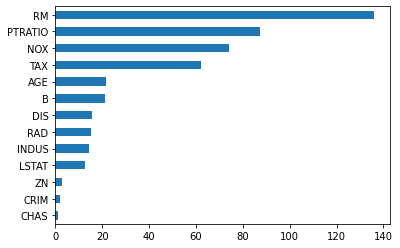

In [42]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF for {df.columns[i]}:",vif)
    vif_list.append(vif)
    
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind='barh')

<AxesSubplot:>

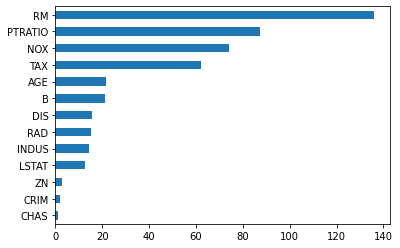

In [43]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    #print(f"VIF for {df.columns[i]}:",vif)
    vif_list.append(vif)
    
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind='barh')

## 5. Model training

### Train_Test Split

In [45]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [74]:
x=df.drop('Target',axis=1)   #2D
y=df['Target']               #1D

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [75]:
y_train

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: Target, Length: 404, dtype: float64

In [76]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22


In [77]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: Target, Length: 102, dtype: float64

In [78]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)    # m and c

LinearRegression()

In [79]:
linear_reg.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [80]:
linear_reg.intercept_

36.53305138282472

# Evaluation

In [81]:
y_pred=linear_reg.predict(x_test)

In [82]:
y_pred[:10]

array([31.0789639 , 31.721694  , 30.87314928, 22.28234976, 18.85606115,
       16.47132499, 36.05004157, 14.64032337, 25.24078574, 36.92073901])

In [83]:
y_test[:10]

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
433    14.3
161    50.0
129    14.3
269    20.7
226    37.6
Name: Target, dtype: float64

# Evaluate on Testing dataset

In [87]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute Error:",mae)

r_squared= r2_score(y_test,y_pred)
print("R Squared Value is:",r_squared)


Mean Squared Error: 34.413968453138416
Root Mean Squared Error: 5.8663419993330095
Mean absolute Error: 4.061419182954704
R Squared Value is: 0.6709339839115642
